In [96]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN

In [36]:
k_values = range(1, 11)

# Set the means for the four clusters
cluster_means = [(-5, 5), (5, 5), (-5, -5), (5, -5)]

# Set the standard deviation (common for all clusters)
std_deviation = 0.6

# Set the standard deviations for two cases: 0.1 and 2.5
std_deviation_01 = 0.1
std_deviation_25 = 2.5

# Set the total number of instances for all clusters
total_instances = 300

In [28]:
# Generate the data for the clusters
X, y = make_blobs(n_samples=total_instances, centers=cluster_means, cluster_std=std_deviation, random_state=42)

# Generate the data for standard deviation 0.1
X_01, y_01 = make_blobs(n_samples=total_instances, centers=cluster_means, cluster_std=std_deviation_01, random_state=42)

# Generate the data for standard deviation 2.5
X_25, y_25 = make_blobs(n_samples=total_instances, centers=cluster_means, cluster_std=std_deviation_25, random_state=42)


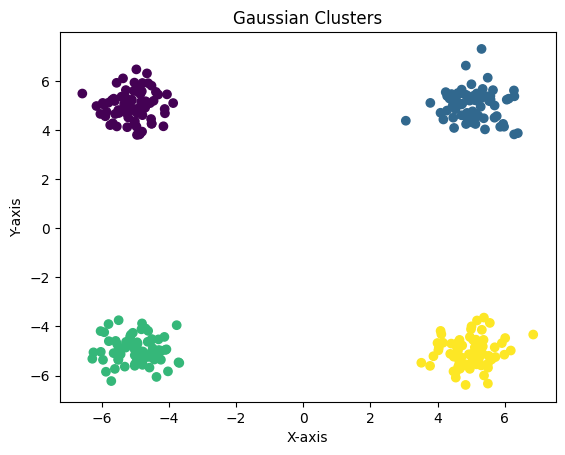

In [29]:

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Gaussian Clusters")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


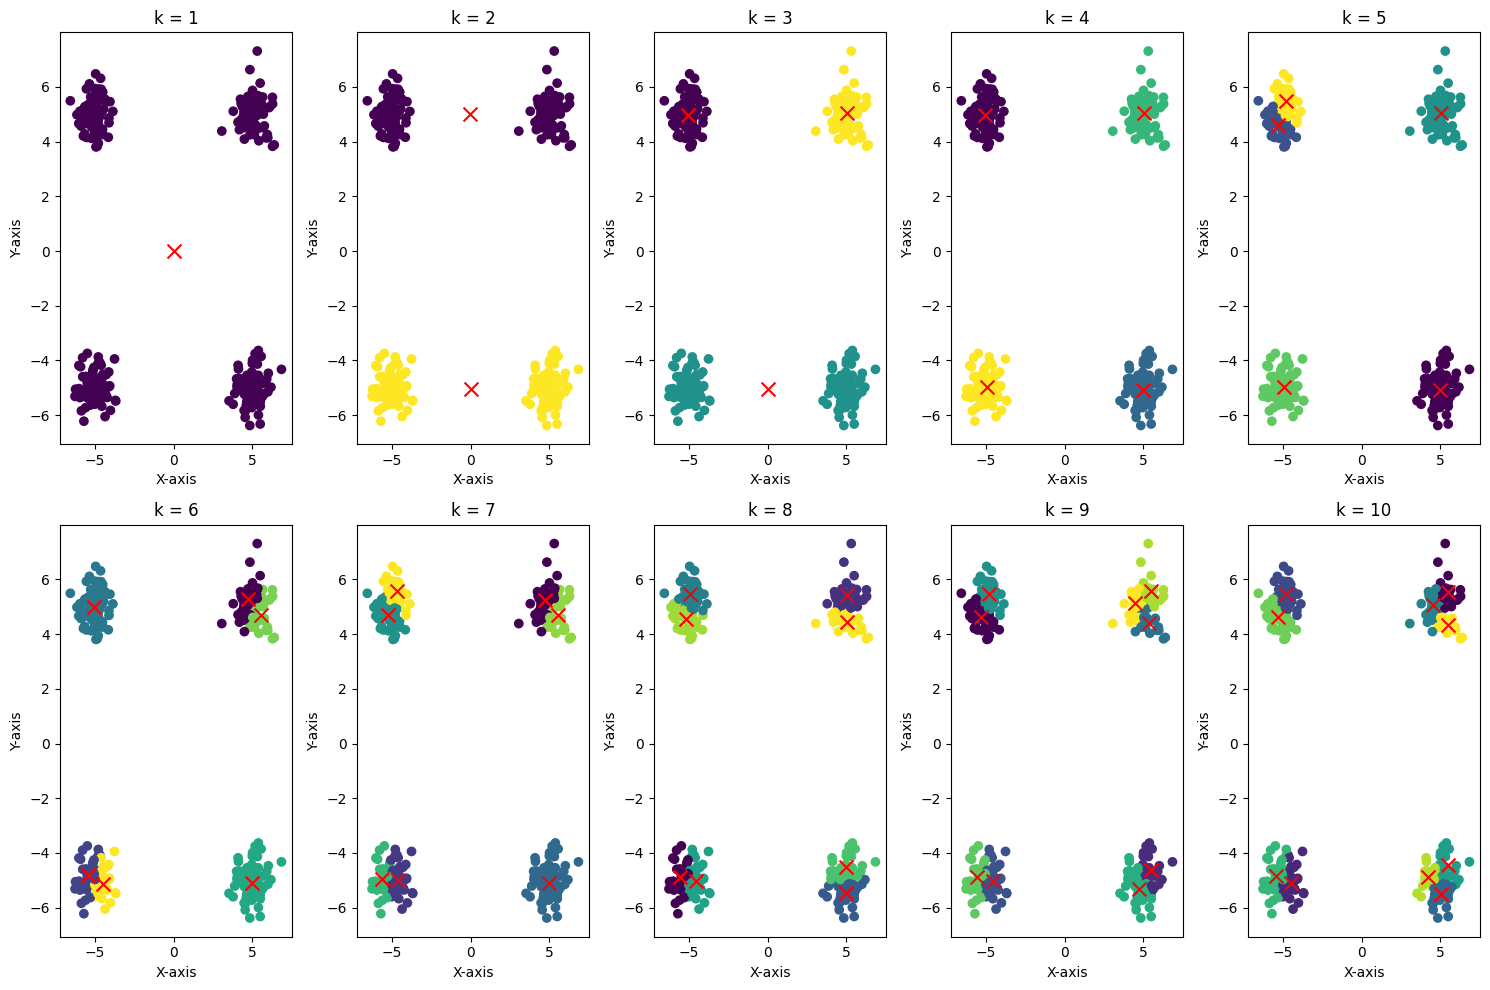

In [30]:
# Initialize empty lists/dictionaries to store results
cluster_assignments = {}
cluster_centers = {}
contingency_tables = {}
sse = []

# Create subplots to visualize the clusters and calculate contingency tables
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    plt.subplot(2, 5, i + 1)

    # Initialize and fit the KMeans model
    # kmeans = KMeans(n_clusters=k, random_state=None)
    kmeans = KMeans(n_clusters=k, random_state=None, n_init=10)
    kmeans.fit(X)
    
    # Calculate SSE for each value of k
    sse.append(kmeans.inertia_)

    # Get cluster assignments for each data point
    cluster_labels = kmeans.labels_
    cluster_assignments[k] = cluster_labels  # Store cluster assignments

    # Get cluster centers
    centers = kmeans.cluster_centers_
    cluster_centers[k] = centers  # Store cluster centers

    # Calculate the contingency matrix
    contingency = contingency_matrix(y, cluster_labels)
    contingency_tables[k] = contingency  # Store contingency tables

    # Plot the data points with cluster colors and centers
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
    plt.title(f'k = {k}')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

plt.tight_layout()
plt.show()

In [16]:
# Now, you can access cluster assignments, cluster centers, and contingency tables outside the loop
for k in k_values:
    print(f'Contingency Table for k = {k}:\n')
    print(contingency_tables[k])
    print('\n')

Contingency Table for k = 1:

[[75]
 [75]
 [75]
 [75]]


Contingency Table for k = 2:

[[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]


Contingency Table for k = 3:

[[ 0 75  0]
 [ 0  0 75]
 [75  0  0]
 [75  0  0]]


Contingency Table for k = 4:

[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]


Contingency Table for k = 5:

[[ 0  0  0 43 32]
 [ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0 75  0  0]]


Contingency Table for k = 6:

[[ 0  0  0 75  0  0]
 [ 0 33  0  0 42  0]
 [37  0  0  0  0 38]
 [ 0  0 75  0  0  0]]


Contingency Table for k = 7:

[[ 0 32  0  0  0 43  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0 37  0  0  0 38]
 [51  0  0  0 24  0  0]]


Contingency Table for k = 8:

[[32  0  0  0  0 43  0  0]
 [ 0  0 35  0 40  0  0  0]
 [ 0  0  0 38  0  0 37  0]
 [ 0 51  0  0  0  0  0 24]]


Contingency Table for k = 9:

[[ 0  0 43  0  0  0  0 32  0]
 [ 0 31  0  0  0 44  0  0  0]
 [29  0  0  0 46  0  0  0  0]
 [ 0  0  0 17  0  0 19  0 39]]


Contingency Table for k = 10:

[[24  0  0  0 27  0  0  

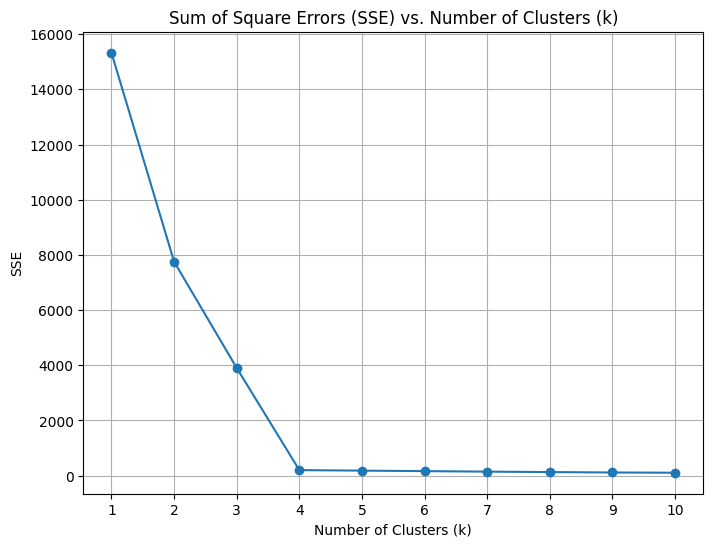

In [19]:
# Plot the SSE values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o', linestyle='-')
plt.title('Sum of Square Errors (SSE) vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.grid(True)

# Mark the "elbow point" if it exists
# You can identify it visually from the plot
plt.xticks(k_values)
plt.show()

In [51]:
# Initialize empty lists/dictionaries to store results
cluster_assignments_01 = {}
cluster_centers_01 = {}
contingency_tables_01 = {}
sse_01 = []

cluster_assignments_25 = {}
cluster_centers_25 = {}
contingency_tables_25 = {}
sse_25 = []

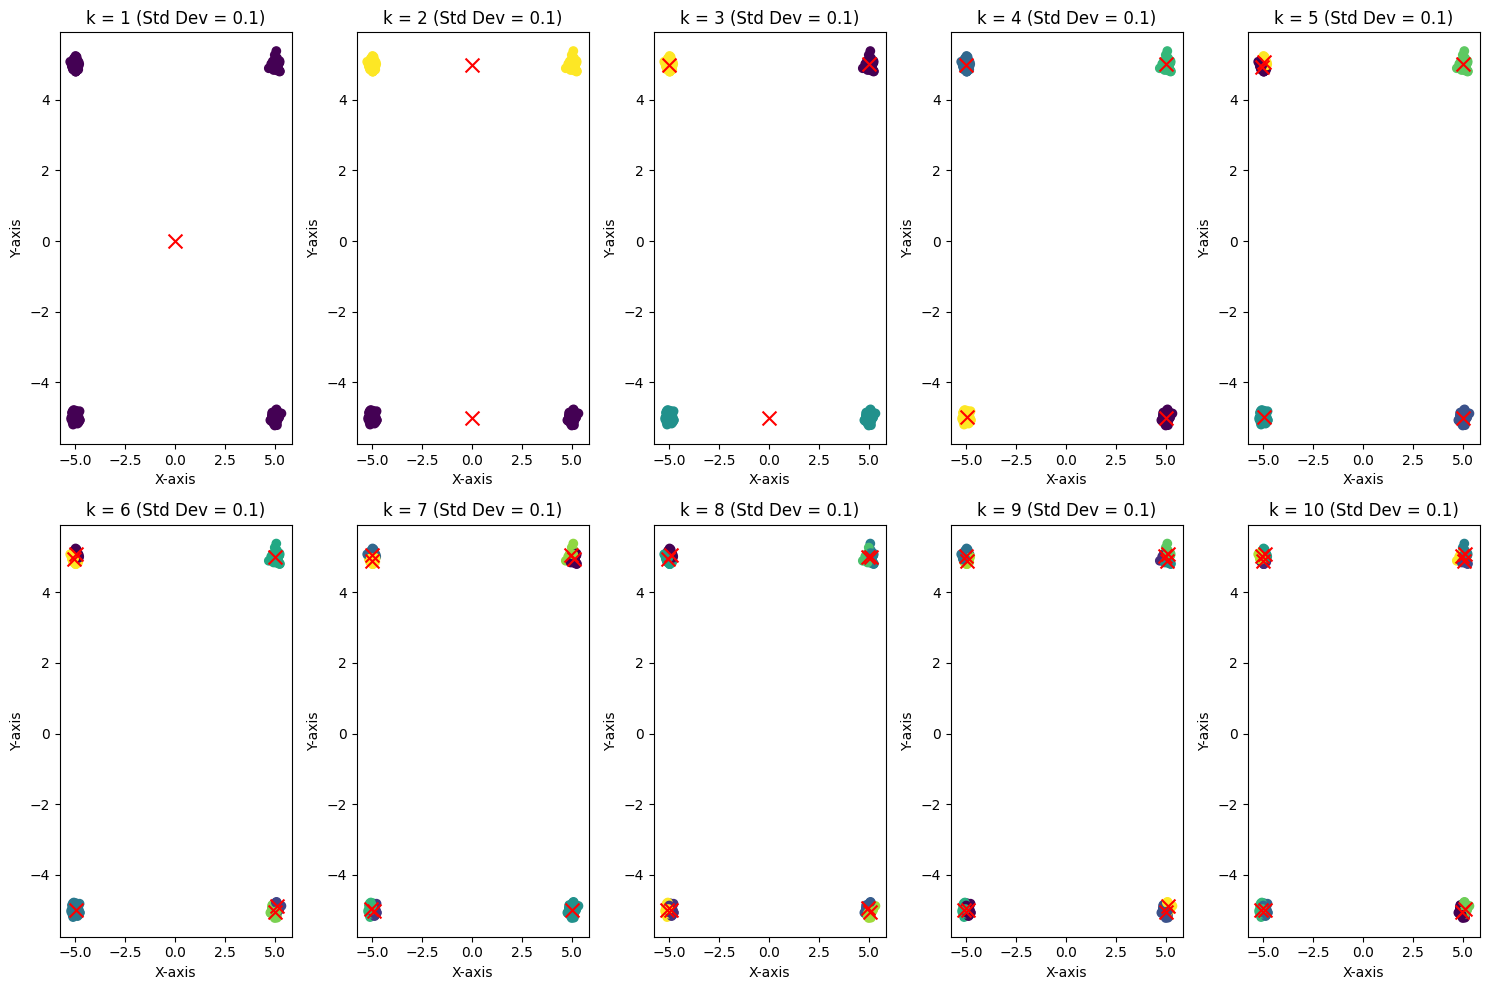

In [52]:
# Create subplots to visualize the clusters and calculate SSE for std deviation 0.1
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    plt.subplot(2, 5, i + 1)

    # Initialize and fit the KMeans model for std deviation 0.1
    kmeans_01 = KMeans(n_clusters=k, random_state=None, n_init=10)
    kmeans_01.fit(X_01)
    
    # Calculate SSE for std deviation 0.1
    sse_01.append(kmeans_01.inertia_)

    # Get cluster assignments for each data point
    cluster_labels_01 = kmeans_01.labels_
    cluster_assignments_01[k] = cluster_labels_01  # Store cluster assignments

    # Get cluster centers
    centers_01 = kmeans_01.cluster_centers_
    cluster_centers_01[k] = centers_01  # Store cluster centers

    # Calculate the contingency matrix
    contingency_01 = contingency_matrix(y_01, cluster_labels_01)
    contingency_tables_01[k] = contingency_01  # Store contingency tables

    # Plot the data points with cluster colors and centers
    plt.scatter(X_01[:, 0], X_01[:, 1], c=cluster_labels_01, cmap='viridis')
    plt.scatter(centers_01[:, 0], centers_01[:, 1], c='red', marker='x', s=100)
    plt.title(f'k = {k} (Std Dev = 0.1)')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

plt.tight_layout()
plt.show()

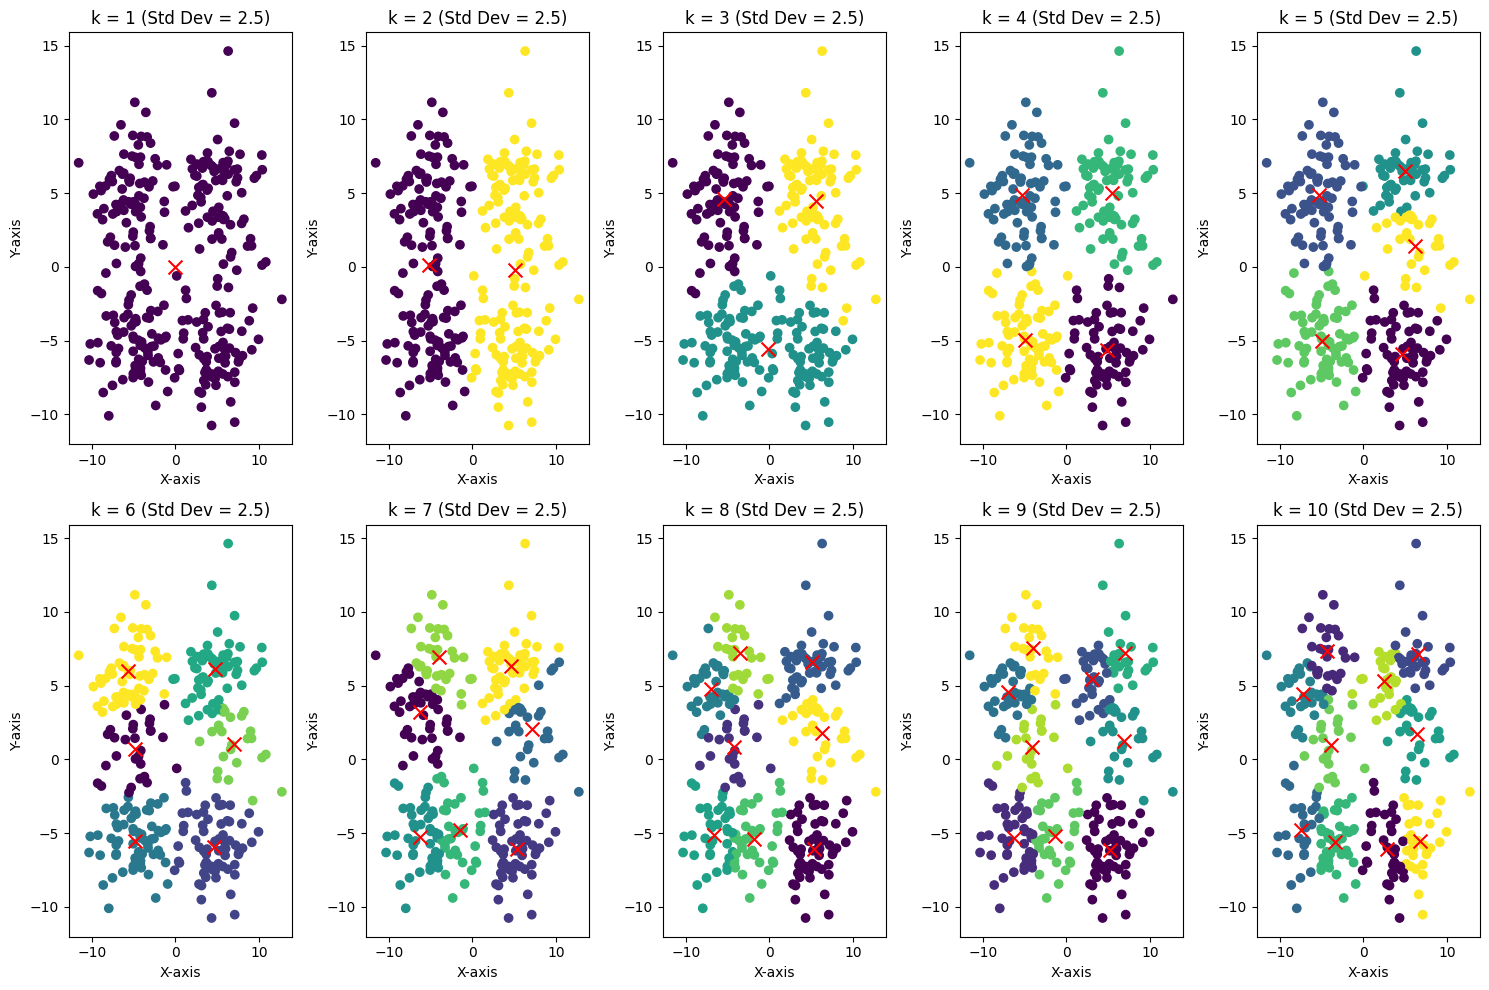

In [53]:
# Create subplots to visualize the clusters and calculate SSE for std deviation 2.5
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    plt.subplot(2, 5, i + 1)

    # Initialize and fit the KMeans model for std deviation 2.5
    kmeans_25 = KMeans(n_clusters=k, random_state=None, n_init=10)
    kmeans_25.fit(X_25)
    
    # Calculate SSE for std deviation 2.5
    sse_25.append(kmeans_25.inertia_)

    # Get cluster assignments for each data point
    cluster_labels_25 = kmeans_25.labels_
    cluster_assignments_25[k] = cluster_labels_25  # Store cluster assignments

    # Get cluster centers
    centers_25 = kmeans_25.cluster_centers_
    cluster_centers_25[k] = centers_25  # Store cluster centers

    # Calculate the contingency matrix
    contingency_25 = contingency_matrix(y_25, cluster_labels_25)
    contingency_tables_25[k] = contingency_25  # Store contingency tables

    # Plot the data points with cluster colors and centers
    plt.scatter(X_25[:, 0], X_25[:, 1], c=cluster_labels_25, cmap='viridis')
    plt.scatter(centers_25[:, 0], centers_25[:, 1], c='red', marker='x', s=100)
    plt.title(f'k = {k} (Std Dev = 2.5)')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

plt.tight_layout()
plt.show()

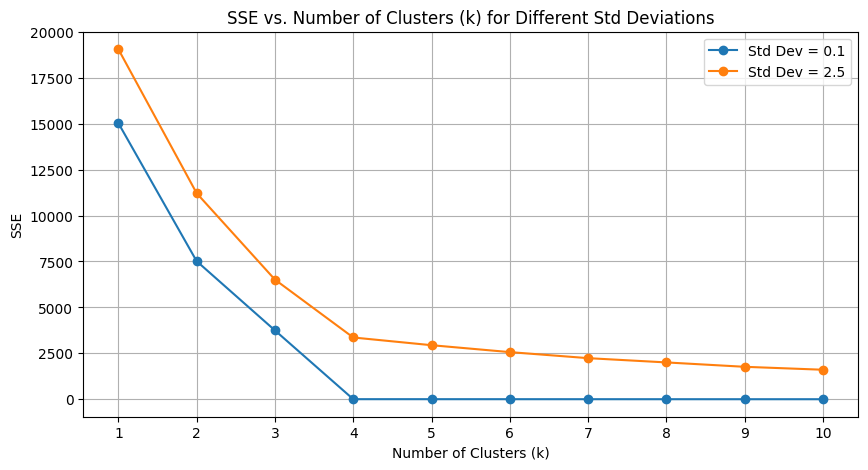

In [54]:
# Plot the SSE values for both standard deviations
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse_01, marker='o', linestyle='-', label='Std Dev = 0.1')
plt.plot(k_values, sse_25, marker='o', linestyle='-', label='Std Dev = 2.5')
plt.title('SSE vs. Number of Clusters (k) for Different Std Deviations')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

In [69]:
# Initialize empty lists/dictionaries to store results
sse_01_random = []
sse_25_random = []

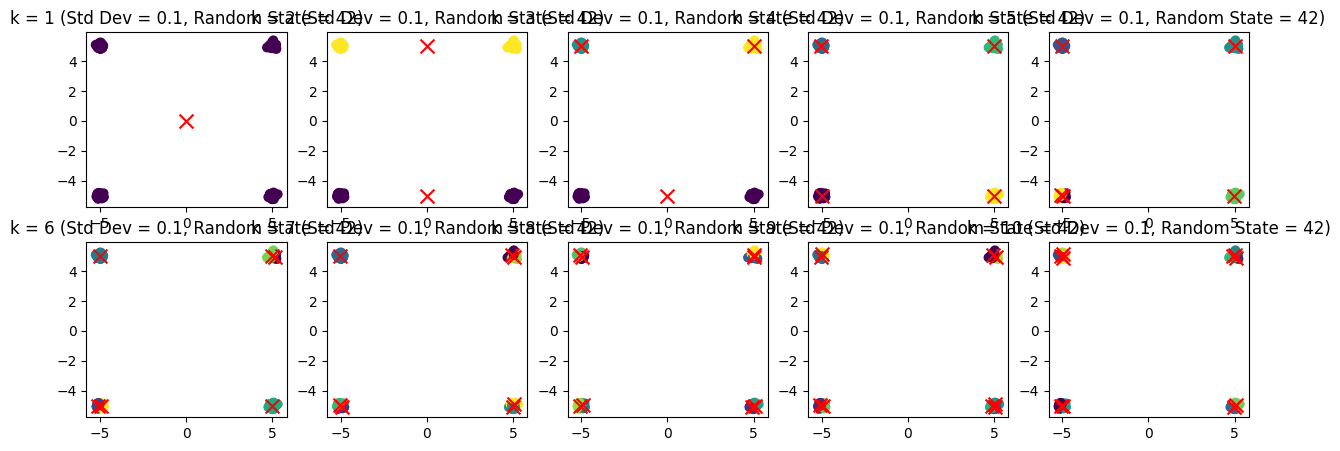

In [70]:
# Create subplots to visualize the clusters and calculate SSE for std deviation 0.1 with random_state
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    plt.subplot(2, 5, i + 1)

    # Initialize and fit the KMeans model for std deviation 0.1 with random_state
    kmeans_01_random = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set a specific random_state
    kmeans_01_random.fit(X_01)
    
    # Calculate SSE for std deviation 0.1 with random_state
    sse_01_random.append(kmeans_01_random.inertia_)

    # Get cluster assignments for each data point
    cluster_labels_01_random = kmeans_01_random.labels_

    # Get cluster centers
    centers_01_random = kmeans_01_random.cluster_centers_

    # Plot the data points with cluster colors and centers (Xs)
    plt.scatter(X_01[:, 0], X_01[:, 1], c=cluster_labels_01_random, cmap='viridis')
    plt.scatter(centers_01_random[:, 0], centers_01_random[:, 1], c='red', marker='x', s=100)
    plt.title(f'k = {k} (Std Dev = 0.1, Random State = 42)')


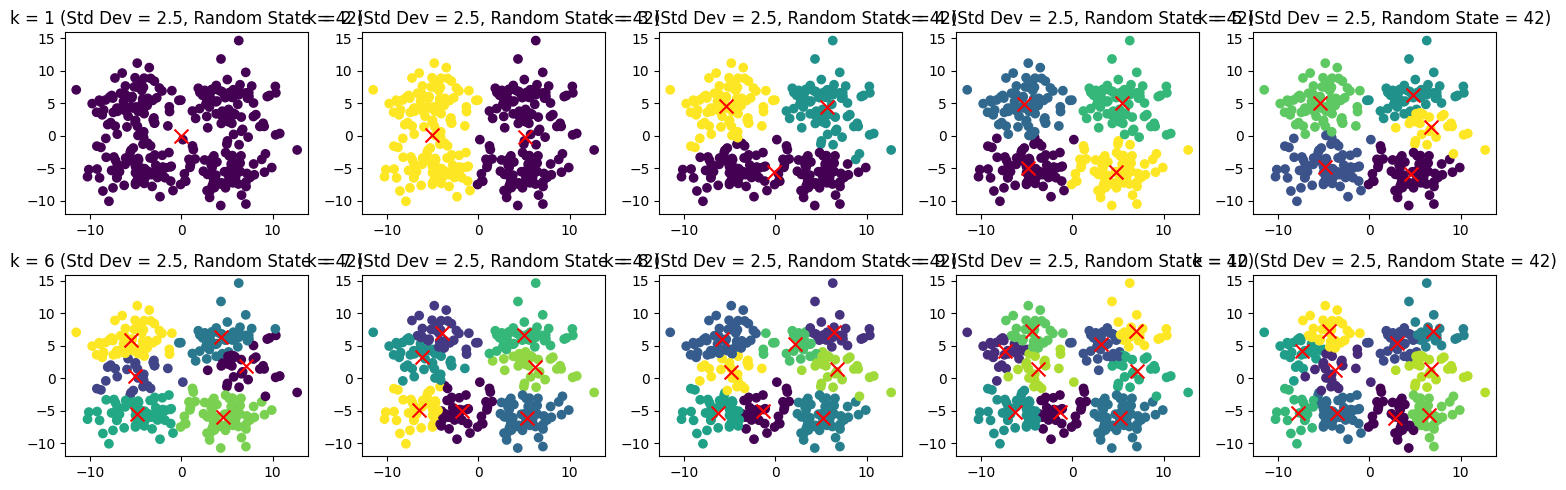

In [71]:
# Create subplots to visualize the clusters and calculate SSE for std deviation 2.5 with random_state
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    plt.subplot(2, 5, i + 1)

    # Initialize and fit the KMeans model for std deviation 2.5 with random_state
    kmeans_25_random = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set a specific random_state
    kmeans_25_random.fit(X_25)
    
    # Calculate SSE for std deviation 2.5 with random_state
    sse_25_random.append(kmeans_25_random.inertia_)

    # Get cluster assignments for each data point
    cluster_labels_25_random = kmeans_25_random.labels_

    # Get cluster centers
    centers_25_random = kmeans_25_random.cluster_centers_

    # Plot the data points with cluster colors and centers (Xs)
    plt.scatter(X_25[:, 0], X_25[:, 1], c=cluster_labels_25_random, cmap='viridis')
    plt.scatter(centers_25_random[:, 0], centers_25_random[:, 1], c='red', marker='x', s=100)
    plt.title(f'k = {k} (Std Dev = 2.5, Random State = 42)')

plt.tight_layout()
plt.show()

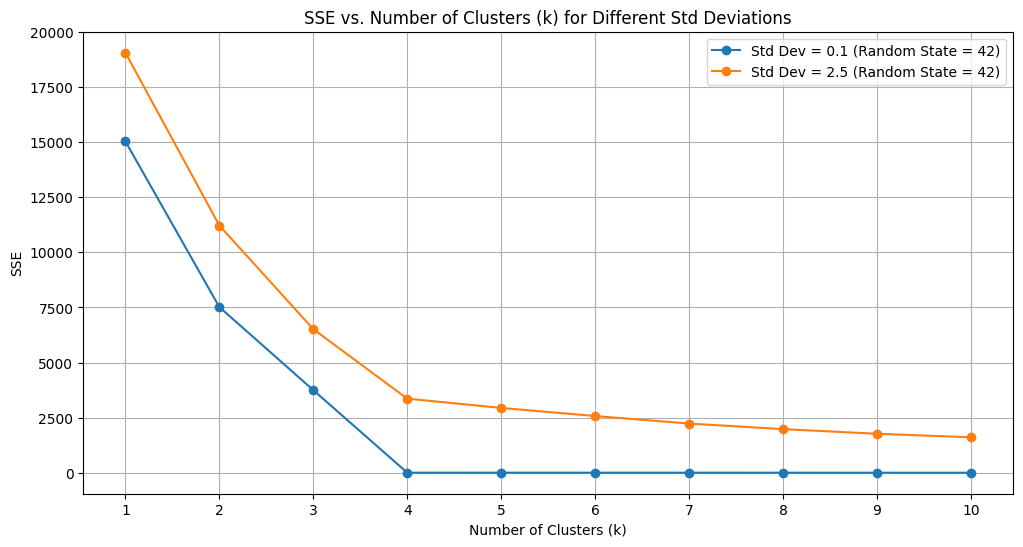

In [72]:
# Plot the SSE values for both standard deviations with Xs for centers
plt.figure(figsize=(12, 6))
plt.plot(k_values, sse_01_random, marker='o', linestyle='-', label='Std Dev = 0.1 (Random State = 42)')
plt.plot(k_values, sse_25_random, marker='o', linestyle='-', label='Std Dev = 2.5 (Random State = 42)')
plt.title('SSE vs. Number of Clusters (k) for Different Std Deviations')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

### Assignment 2

In [78]:
# Load the vertebrate.csv data
data_2 = pd.read_csv('vertebrate.csv')

data_2.head()

Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
0   human             1            1                 0                0   
1  python             0            0                 0                0   
2  salmon             0            0                 1                0   
3   whale             1            1                 1                0   
4    frog             0            0                 1                0   

   Has Legs  Hibernates       Class  
0         1           0     mammals  
1         0           1    reptiles  
2         0           0      fishes  
3         0           0     mammals  
4         1           1  amphibians

Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
0   human             1            1                 0                0   
1  python             0            0                 0                0   
2  salmon             0            0                 1                0   
3   whale             1            1                 1                0   
4    frog             0            0                 1                0   

   Has Legs  Hibernates  
0         1           0  
1         0           1  
2         0           0  
3         0           0  
4         1           1

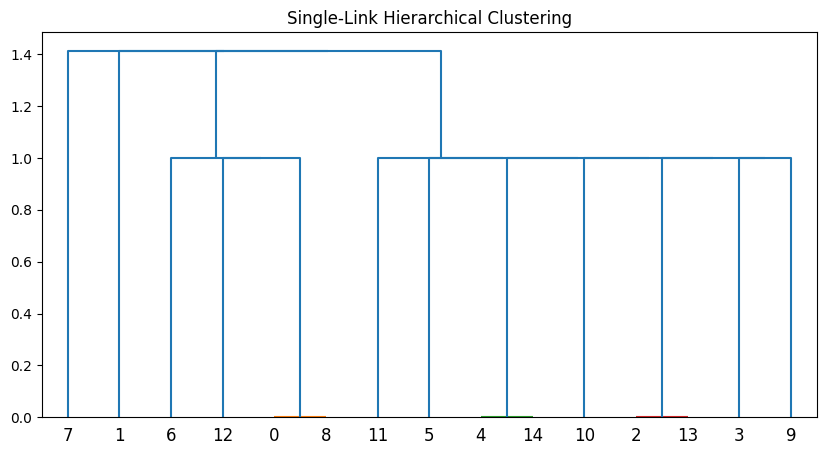

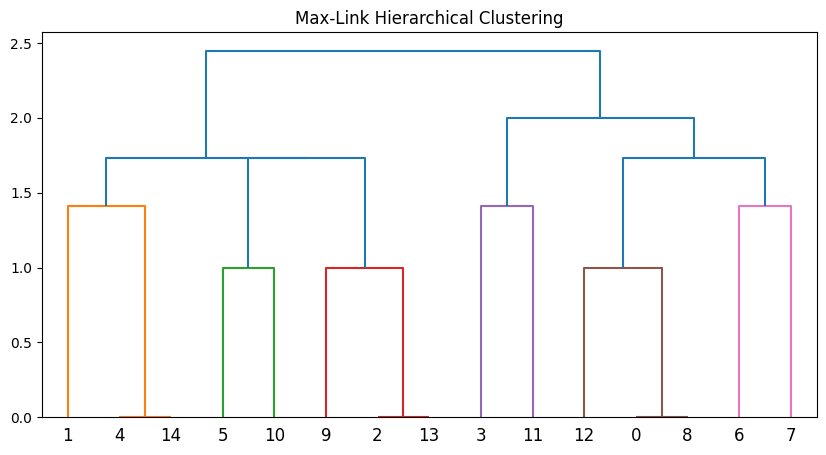

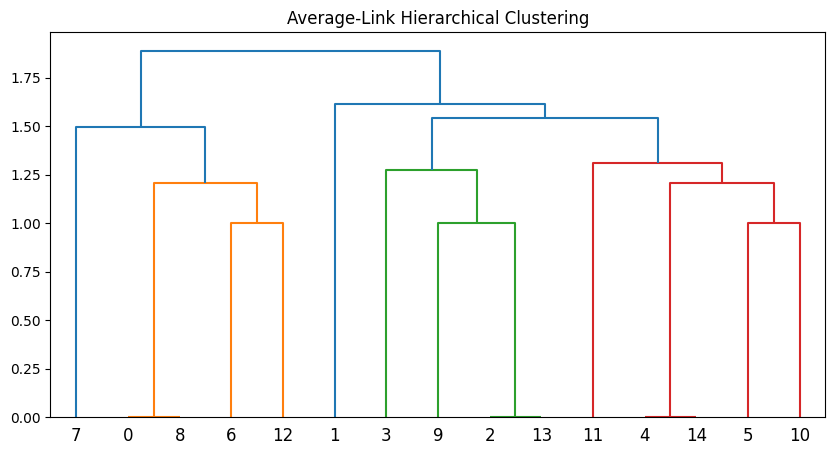

In [91]:
# Extract the features (columns) from the data
features = data_2.iloc[:, 1:]
features = features.drop(columns=['Class'])
# features = data.drop(columns=['Name'])

# Perform single-link hierarchical clustering
single_linkage = hierarchy.linkage(features, method='single')

# Visualize the single-link hierarchy
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(single_linkage)
plt.title('Single-Link Hierarchical Clustering')
plt.show()

# Perform max-link hierarchical clustering
max_linkage = hierarchy.linkage(features, method='complete')

# Visualize the max-link hierarchy
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(max_linkage)
plt.title('Max-Link Hierarchical Clustering')
plt.show()

# Perform average-link hierarchical clustering
average_linkage = hierarchy.linkage(features, method='average')

# Visualize the average-link hierarchy
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(average_linkage)
plt.title('Average-Link Hierarchical Clustering')
plt.show()


### Assignment 3

In [93]:
# Load the chameleon.csv data
data_3 = pd.read_csv('chameleon.csv')

data_3.head()

x        y
0  650.914  214.888
1   41.767  179.408
2  509.126  233.749
3  486.403  152.427
4   46.883  367.904

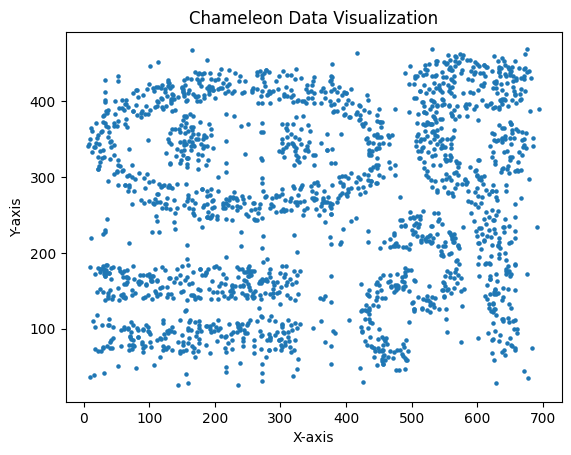

In [95]:
# Visualize the data
plt.scatter(data_3['x'], data_3['y'], s=5)
plt.title('Chameleon Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

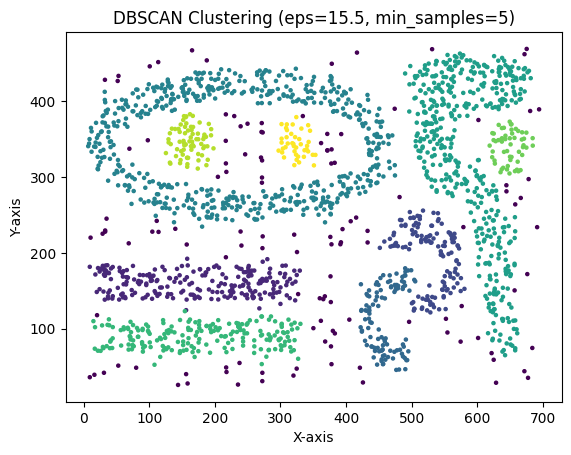

In [99]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=15.5, min_samples=5)
cluster_labels = dbscan.fit_predict(data_3)

# Visualize the clustering results
plt.scatter(data_3['x'], data_3['y'], c=cluster_labels, s=5, cmap='viridis')
plt.title('DBSCAN Clustering (eps=15.5, min_samples=5)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

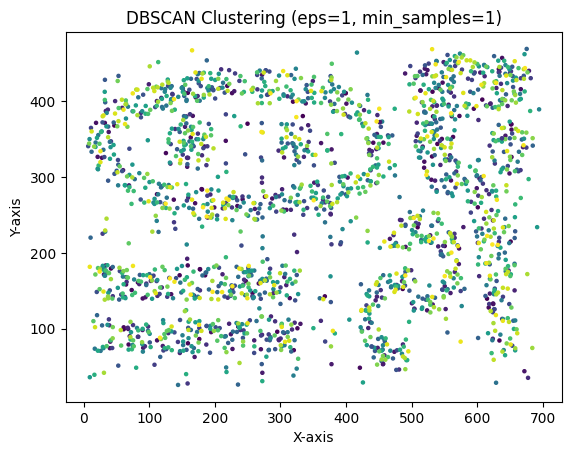

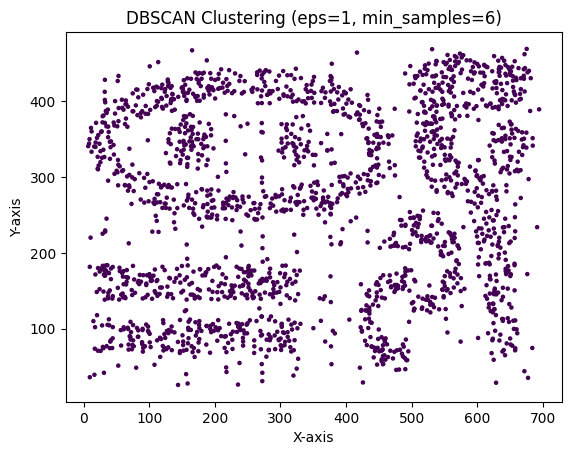

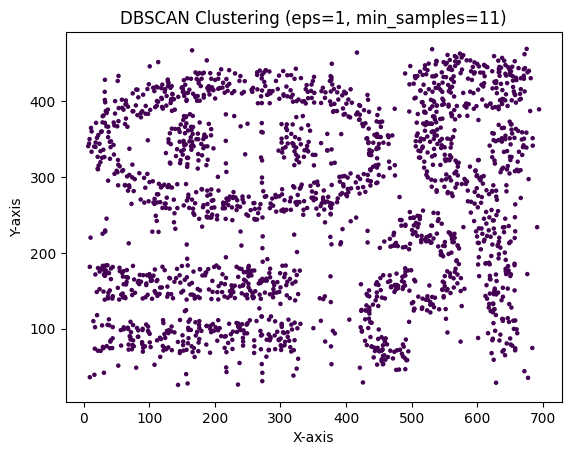

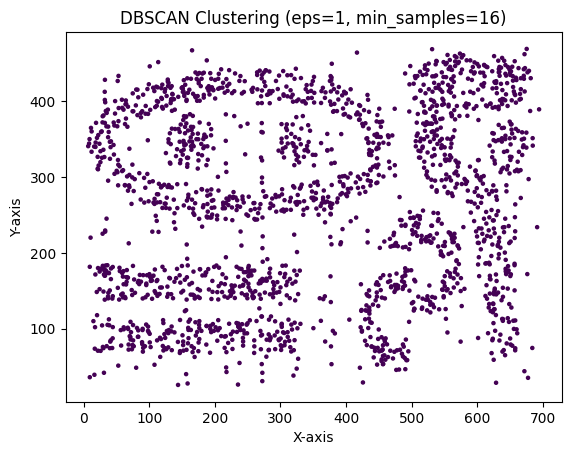

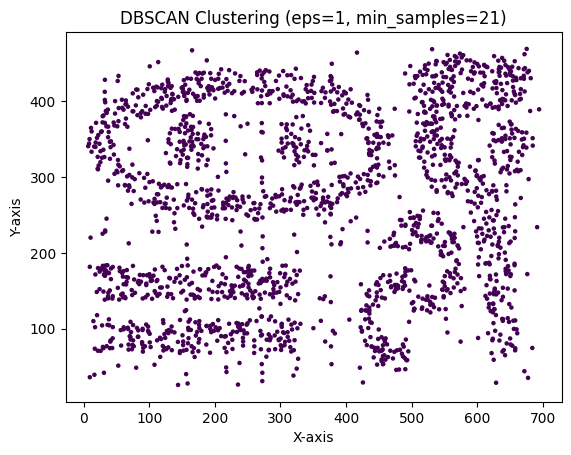

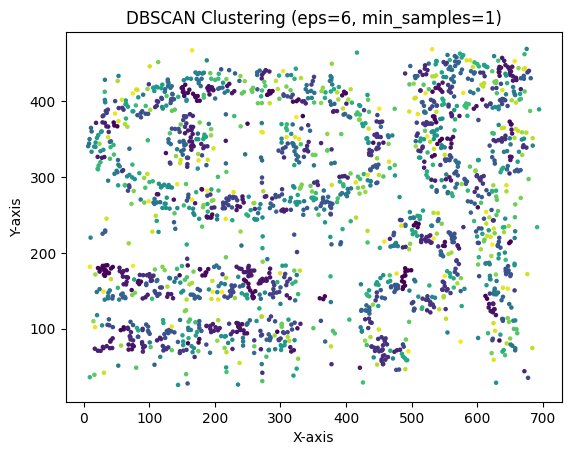

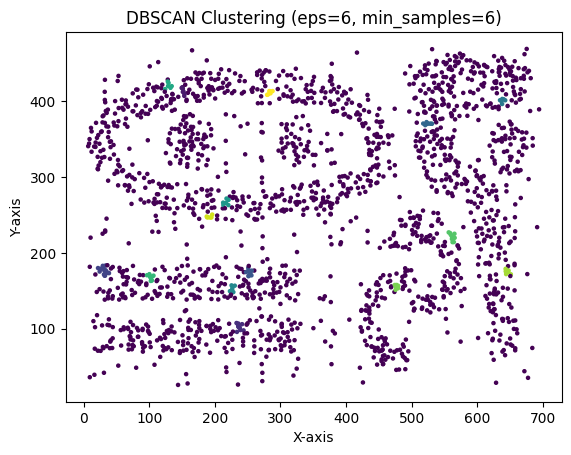

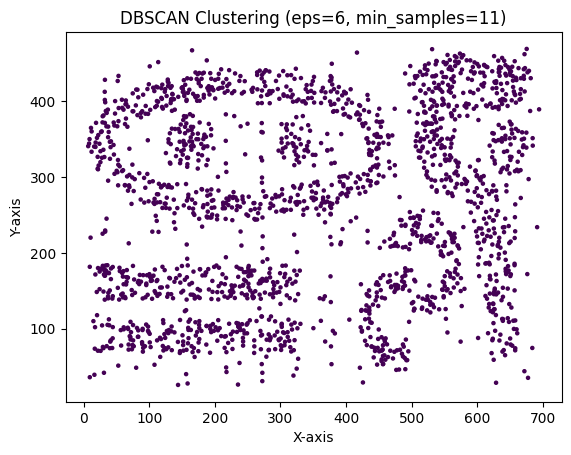

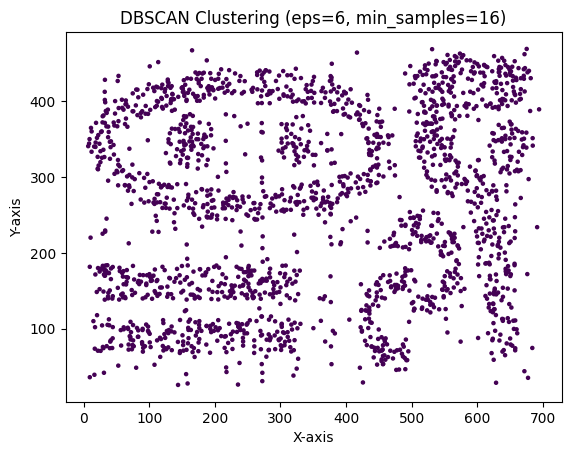

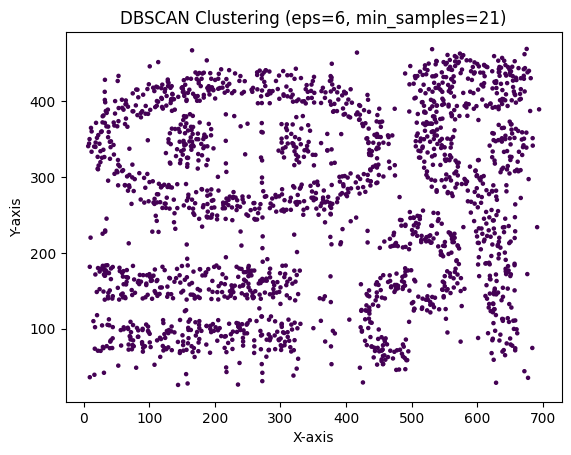

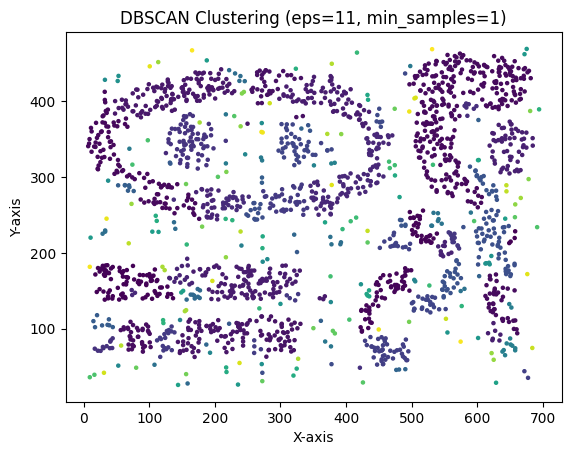

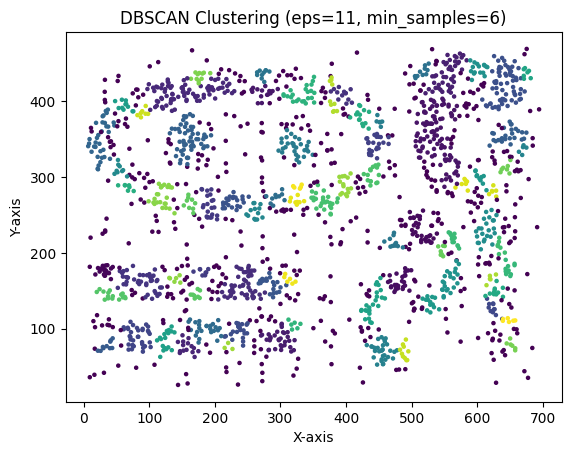

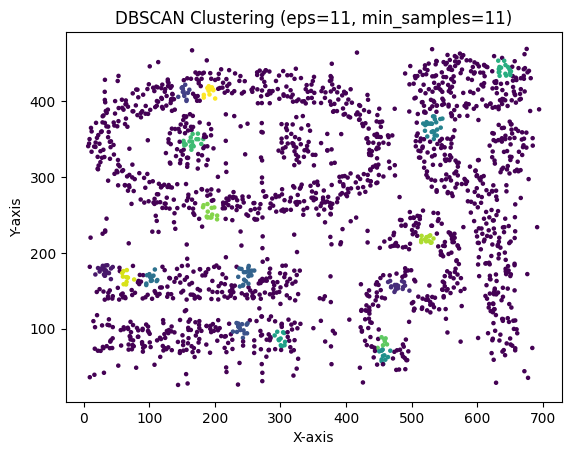

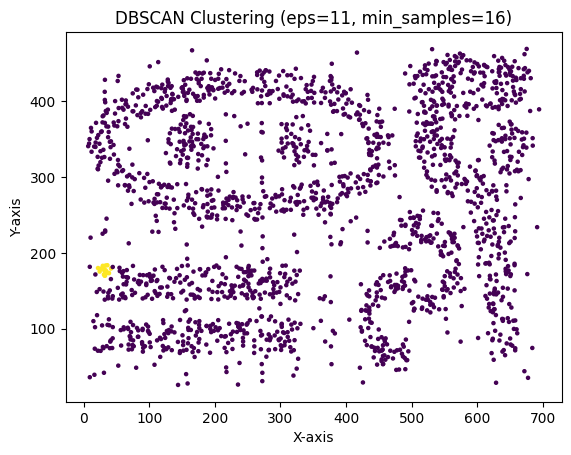

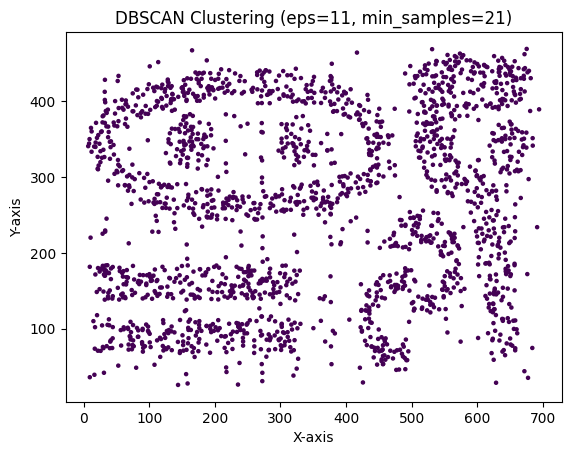

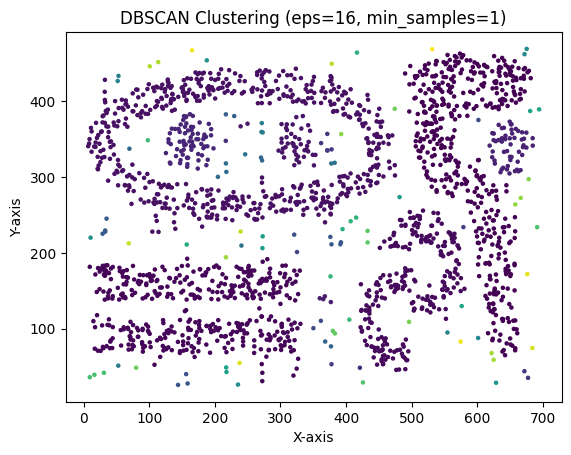

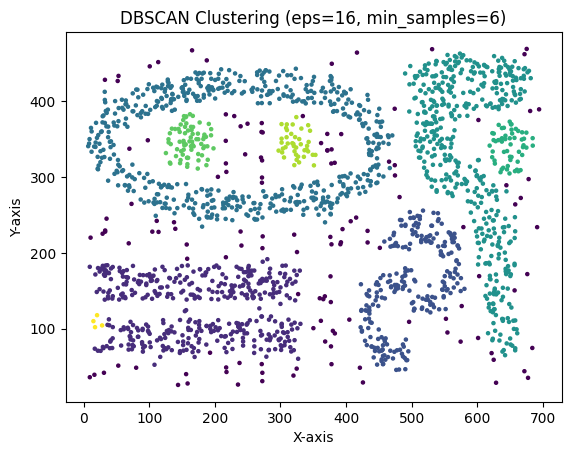

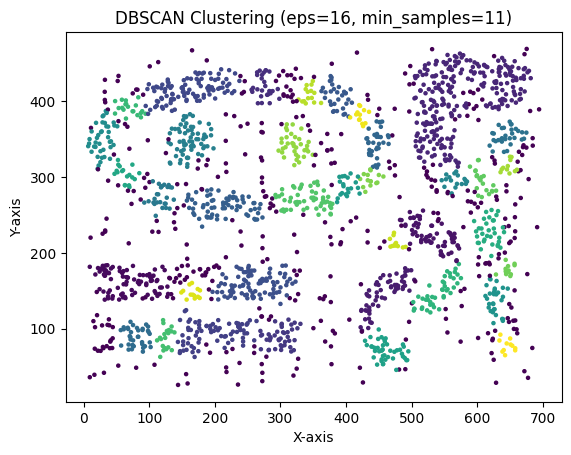

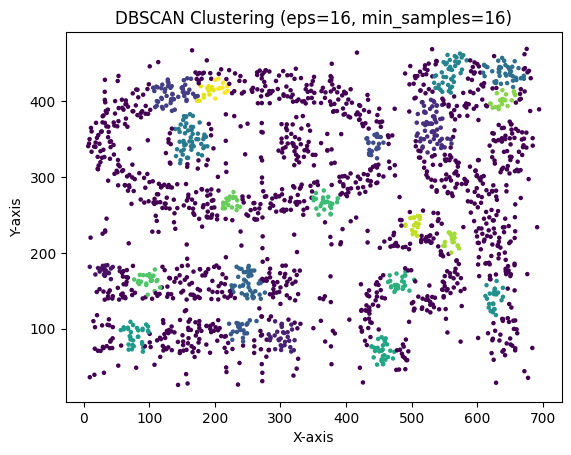

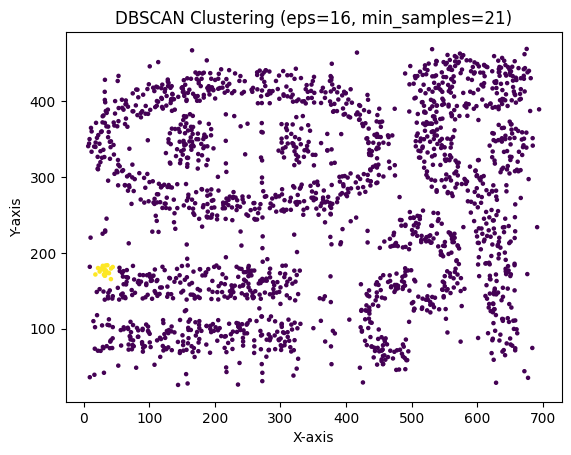

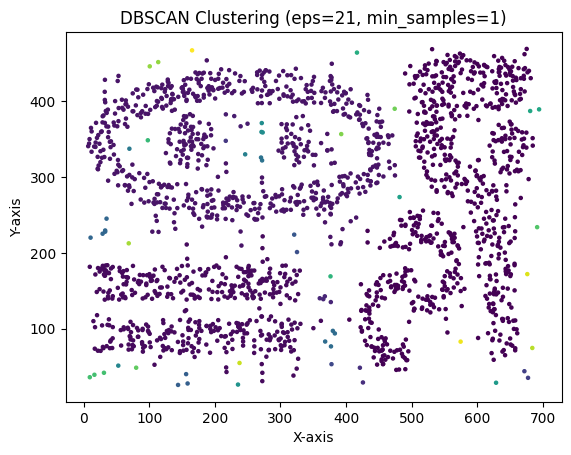

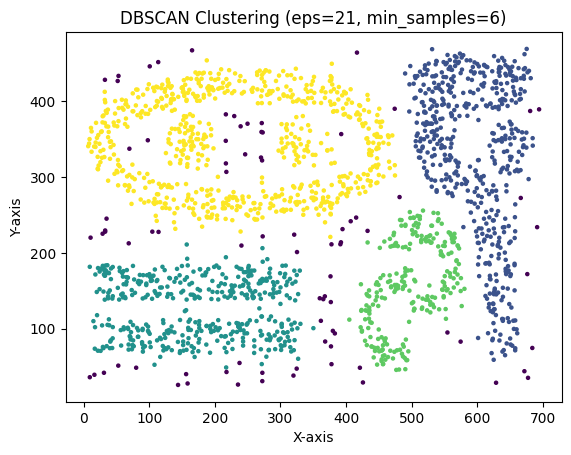

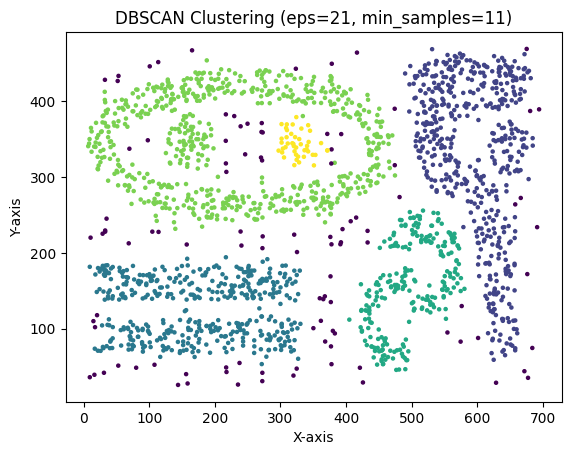

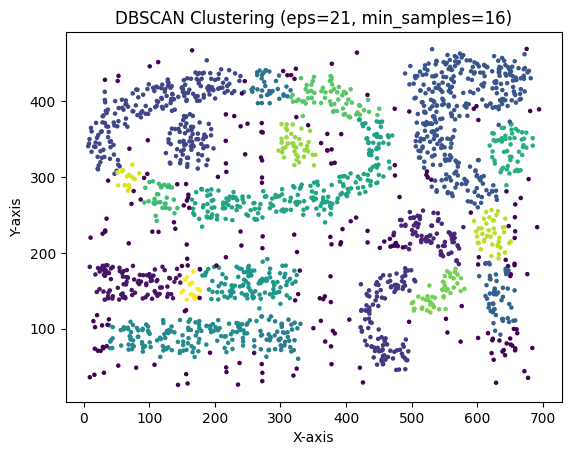

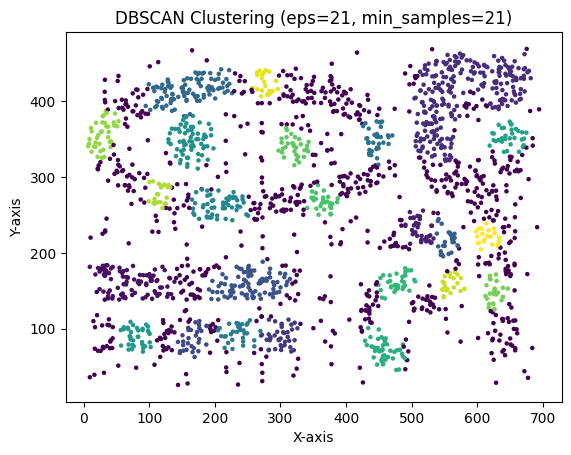

In [101]:
eps_values = np.arange(1, 22, 5)
min_samples_values = np.arange(1, 22, 5)

# Loop through different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data_3)
        
        # Visualize the clustering results
        plt.scatter(data_3['x'], data_3['y'], c=cluster_labels, s=5, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()